In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Load the CSV file
df = pd.read_csv('processed_data_best_corr_sentiment.csv')

# Displaying the first few rows to understand the data
print("Data Preview:")
display(df.head())

# Basic statistics
print("\nBasic Statistics:")
display(df[['BRENT Close', 'USDX', 'SENT']].describe())

# Check for missing values
print("\nMissing Values:")
display(df[['BRENT Close', 'USDX', 'SENT']].isna().sum())

Data Preview:


,Date,BRENT Close,BRENT Volume,BRENT Price_Difference,BRENT Volume_Difference,USDX,USDX Price_Difference,SENT,BRENT Close_capped,USDX Close_capped,BRENT Volume_capped,BRENT Close_scaled,USDX Close_scaled,BRENT Volume_scaled,BRENT Close_minmax,USDX Close_minmax,BRENT Volume_minmax,BRENT Volume_log,BRENT Price_Difference_log,USDX Price_Difference_log
0,2012-01-03,112.129997,1064.0,0.000000,0.0,79.610001,0.000000,-34.296692,112.129997,79.610001,1064.0,1.518216,-1.620712,-1.352802,0.868182,0.053557,0.012204,6.970730,2.477378,1.214911
1,2012-01-04,113.699997,1426.0,1.570000,362.0,80.089996,0.479996,-35.878425,113.699997,80.089996,1426.0,1.577418,-1.554253,-1.329855,0.882870,0.072742,0.016356,7.263330,2.601207,1.348071
2,2012-01-05,112.739998,687.0,-0.959999,-739.0,80.940002,0.850006,-39.201837,112.739998,80.940002,687.0,1.541218,-1.436564,-1.376700,0.873889,0.106715,0.007880,6.533789,2.393340,1.439835
3,2012-01-06,113.059998,709.0,0.320000,22.0,81.239998,0.299995,-32.513853,113.059998,81.239998,709.0,1.553285,-1.395027,-1.375306,0.876883,0.118705,0.008132,6.565265,2.503892,1.300189
4,2012-01-09,112.449997,595.0,-0.610001,-114.0,81.050003,-0.189995,18.786006,112.449997,81.050003,595.0,1.530283,-1.421333,-1.382532,0.871176,0.111111,0.006825,6.390241,2.424803,1.156881



Basic Statistics:


,BRENT Close,USDX,SENT
count,2306.000000,2306.000000,2306.000000
mean,71.868161,91.315516,-7297.254844
std,26.524931,7.224019,3236.337959
min,19.330000,78.269997,-14033.466069
25%,50.790001,82.680000,-9762.788090
50%,63.610001,94.045002,-7145.990994
75%,103.147503,97.120003,-4640.845592
max,126.220001,103.290001,18.786006



Missing Values:


BRENT Close    0
USDX           0
SENT           0
dtype: int64

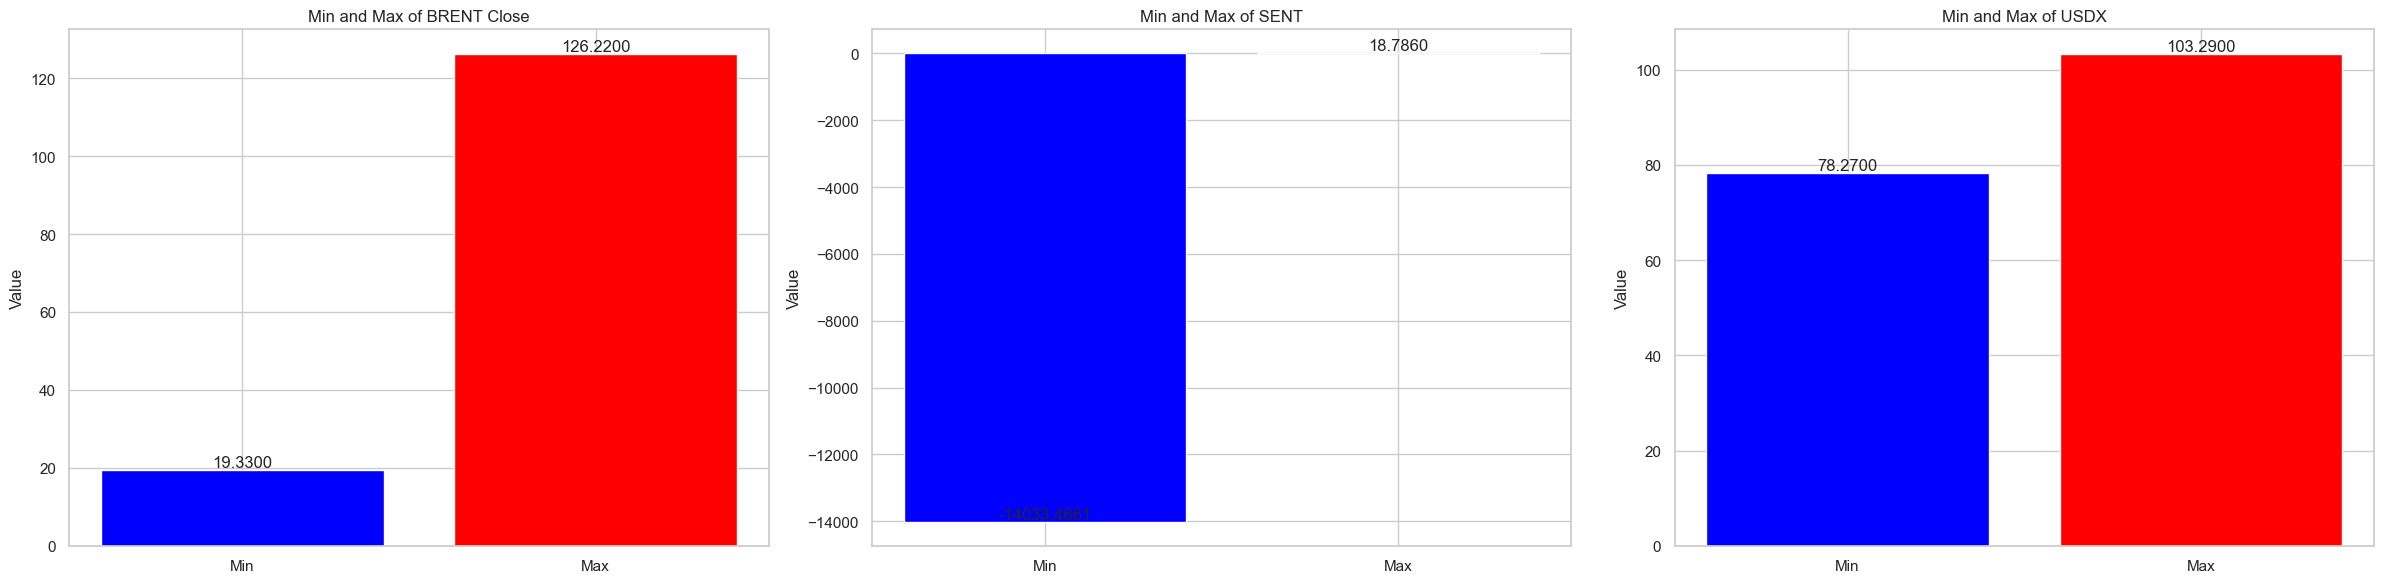

In [3]:
# Create a figure with three subplots for min/max visualization
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Variables to visualize
variables = ['BRENT Close', 'SENT','USDX']

for i, var in enumerate(variables):
    min_val = df[var].min()
    max_val = df[var].max()
    
    # Create a bar chart for min and max
    axes[i].bar(['Min', 'Max'], [min_val, max_val], color=['blue', 'red'])
    axes[i].set_title(f'Min and Max of {var}')
    axes[i].set_ylabel('Value')
    
    # Add value labels on the bars
    axes[i].text(0, min_val, f'{min_val:.4f}', ha='center', va='bottom')
    axes[i].text(1, max_val, f'{max_val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

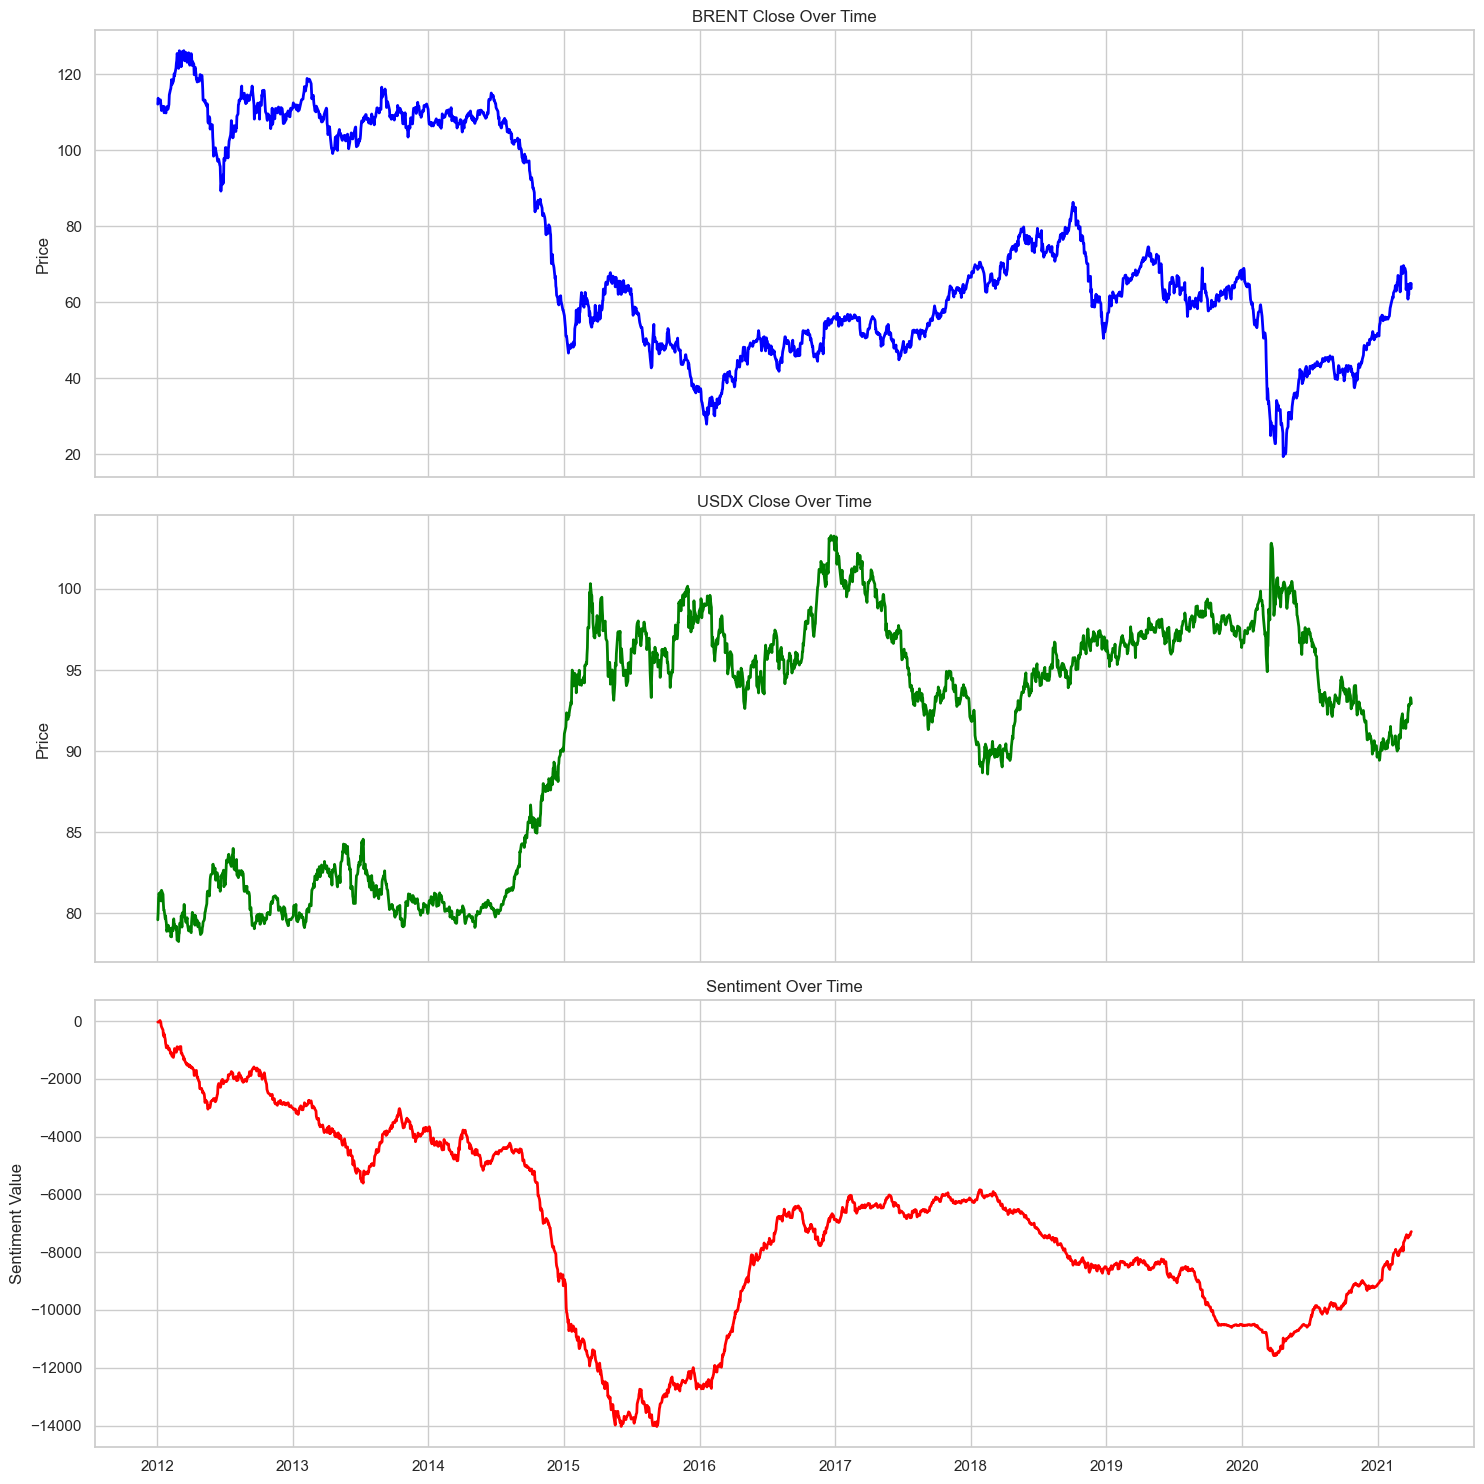

In [4]:
# Check if there's a date column
date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]

if date_columns:
    # If date column exists, convert to datetime
    date_col = date_columns[0]
    df[date_col] = pd.to_datetime(df[date_col])
    df.set_index(date_col, inplace=True)

# Create subplots for time series visualization (3 separate plots)
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Plot BRENT Close
axes[0].plot(df['BRENT Close'], color='blue', linewidth=2)
axes[0].set_title('BRENT Close Over Time')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Plot USDX Close
axes[1].plot(df['USDX'], color='green', linewidth=2)
axes[1].set_title('USDX Close Over Time')
axes[1].set_ylabel('Price')
axes[1].grid(True)

# Plot SENT
axes[2].plot(df['SENT'], color='red', linewidth=2)
axes[2].set_title('Sentiment Over Time')
axes[2].set_ylabel('Sentiment Value')
axes[2].grid(True)

plt.tight_layout()
plt.show()

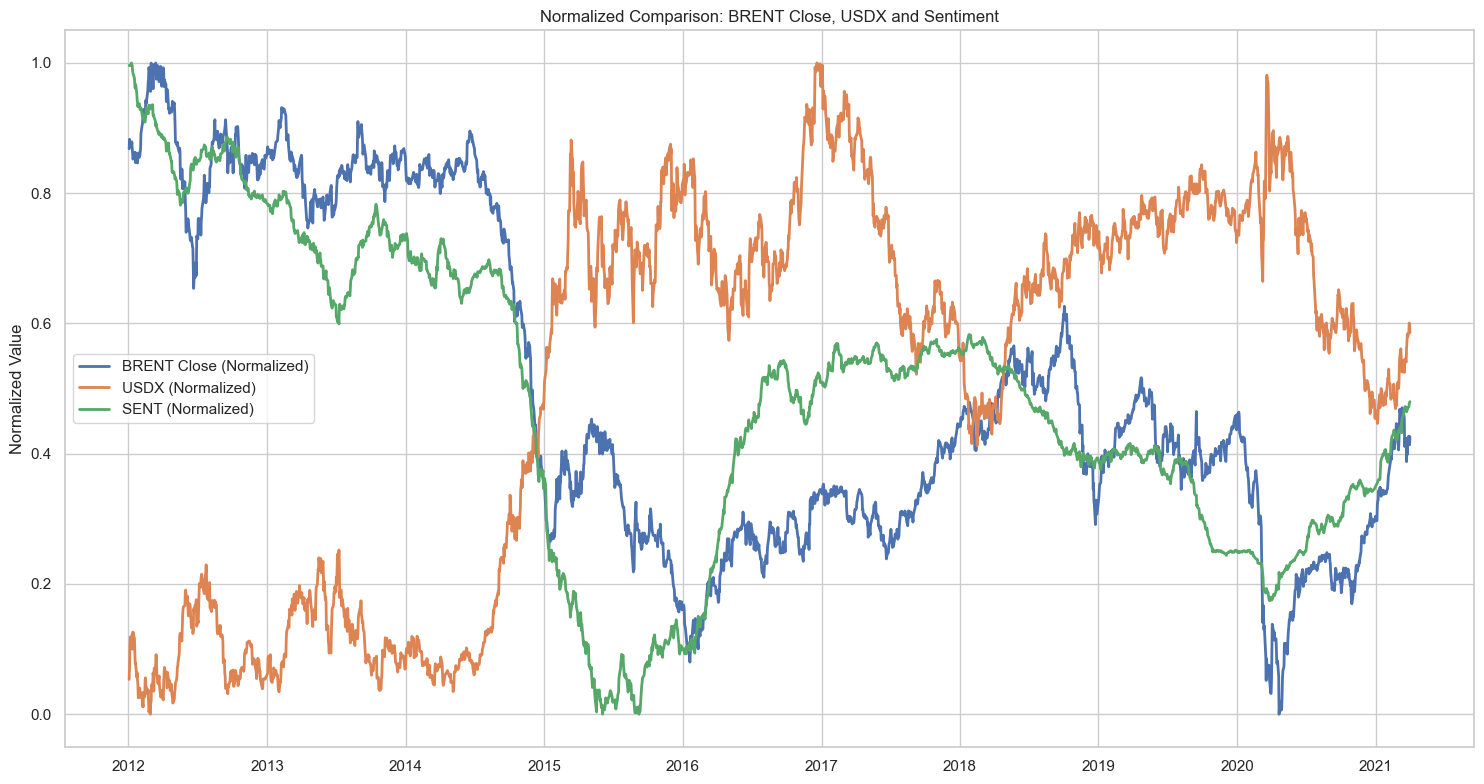

In [5]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Create a figure for combined visualization
plt.figure(figsize=(15, 8))

# Plot normalized series
plt.plot(normalize(df['BRENT Close']), label='BRENT Close (Normalized)', linewidth=2)
plt.plot(normalize(df['USDX']), label='USDX (Normalized)', linewidth=2)
plt.plot(normalize(df['SENT']), label='SENT (Normalized)', linewidth=2)

plt.title('Normalized Comparison: BRENT Close, USDX and Sentiment')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()